In [295]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [296]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [297]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [298]:
df['Target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [299]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [300]:
df['flower_name'] =df.Target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [301]:
X = df.drop(['Target','flower_name'], axis='columns')
y = df.Target

In [302]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [303]:
len(X)

150

In [304]:
len(X_train)

120

In [305]:
len(X_test)

30

In [306]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=48)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=48)

In [307]:
model.score(X_test, y_test)

0.9666666666666667

In [308]:
y_predicted = model.predict(X_test)

In [309]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

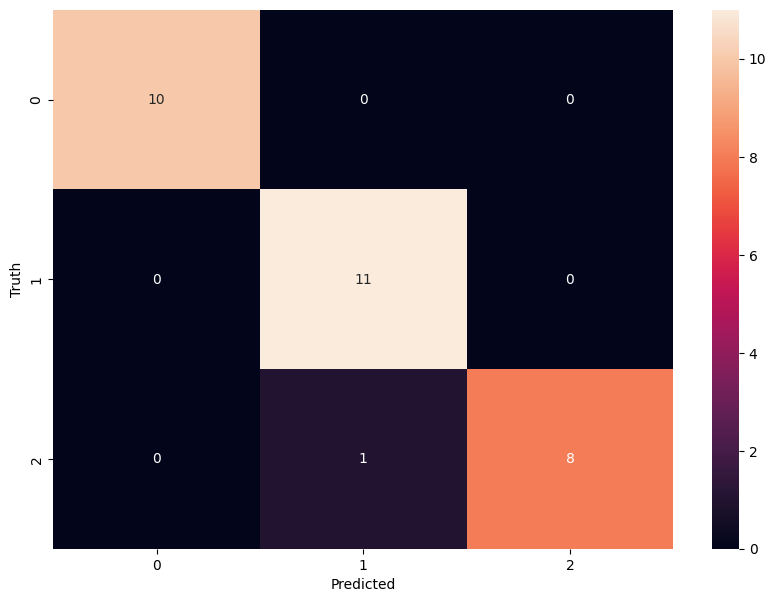

In [310]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')